In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading QoS analysis raw info
Temporarily, this info is saved in a CSV file but it will be in the database

**qos_analysis_13112018.csv**
- columns = ['url','protocol','code','start','end','duration','runid']
- First try of qos analysis.
- It was obtained from 50 repetitions of each of 3921 eepsites gathered. 
- Just one i2router (UCA desktop host)
- Time gap between each eepsite request 3921*0.3sec=1176sec/60sec ~ 19 mins
- Total experiment elapsed time 50rep X 19 mins ~ 16 hours

**qos_analysis_29112018_local.csv**

- columns = ['url','code','duration','runid']
- 100 repetions of the first 10 eepsite from the list. Just for testing.
- local i2prouter from my laptop
- Time gap between each eepsite 10*5sec=50sec ~ 60s
- Total experiment elapsed time 100rep x 1min ~ 100 mins



In [28]:
# File for processing it
qos_file = 'qos_analysis_13112018.csv'
path_to_file = 'data/' + qos_file

columns = ['url','protocol','code','start','end','duration','runid']
df_qos = pd.read_csv(path_to_file,names=columns,delimiter="|")

# File for processing it - local router
qos_file = 'qos_analysis_29112018_local.csv'
path_to_file = 'data/' + qos_file
columns = ['url','code','duration','runid']
df_qos_local = pd.read_csv(path_to_file,names=columns,delimiter="|")

# File for processing it - local router
qos_file = 'qos_analysis_29112018_remote.csv'
path_to_file = 'data/' + qos_file
columns = ['url','code','duration','runid']
df_qos_remote = pd.read_csv(path_to_file,names=columns,delimiter="|")

In [29]:
# Removing not valid rounds
df_qos['runid'] = pd.to_numeric(df_qos['runid'], errors='coerce').dropna()

# Removing nor valid rounds
df_qos_local['runid'] = pd.to_numeric(df_qos_local['runid'], errors='coerce').dropna()

# Removing not valid rounds
df_qos_remote['runid'] = pd.to_numeric(df_qos_remote['runid'], errors='coerce').dropna()

In [31]:
df_qos_local.head()

url  code   duration  runid
0                               http://thematrix.i2p   500   0.489045    0.0
1  http://kgh3va66n5fqrtlhqsen2km6x7k2362hn5edk5o...   504  15.015469    0.0
2                        http://tracker.thebland.i2p   504  60.756621    0.0
3                       http://tracker.crypthost.i2p   504  60.759131    0.0
4                          http://syndie-project.i2p   504  60.756913    0.0

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text xticklabel objects>)

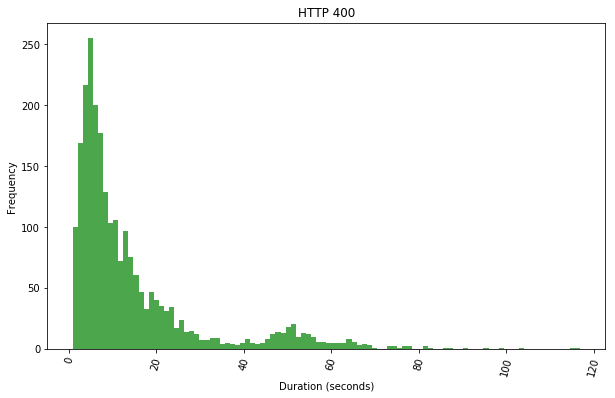

In [5]:
# Duration distribution by http response
fig, ax1 = plt.subplots(figsize=(10, 6))

# http code
code = 400

df_to_plot = df_qos[(df_qos['code']==code)]['duration']
#df_qos[(df_qos['code']==500)]['duration'].hist(bins=100)

df_to_plot.plot(kind='hist',bins=100, ax=ax1, color={'r','g'}, alpha=0.7)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Duration (seconds)')
ax1.set_title('HTTP ' + str(code))
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=75)

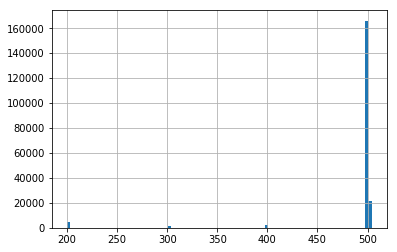

In [6]:
df_qos['code'].hist(bins=100)

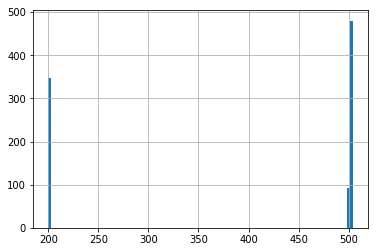

In [20]:
df_qos_local['code'].hist(bins=100)

In [7]:
df_qos['code'].unique()

array([400, 200, 500, 302, 504, 301, 503, 401, 403, 429, 502])

In [21]:
df_qos_local['code'].unique()

array([500, 504, 200, 503])

In [18]:
df_qos.code.value_counts()

500    165978
504     21203
200      4669
400      2392
301       684
302       367
503       200
403        53
401        43
429         4
502         1
Name: code, dtype: int64

In [22]:
df_qos_local.code.value_counts()

504    446
200    348
500     93
503     34
Name: code, dtype: int64

In [23]:
df_qos_local.describe()

code    duration       runid
count  921.000000  921.000000  920.000000
mean   388.692725   27.495813   45.515217
std    147.135282   27.696956   26.595871
min    200.000000    0.406955    0.000000
25%    200.000000    1.716115   22.750000
50%    503.000000   10.299843   45.500000
75%    504.000000   60.758360   68.250000
max    504.000000   60.770772   92.000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

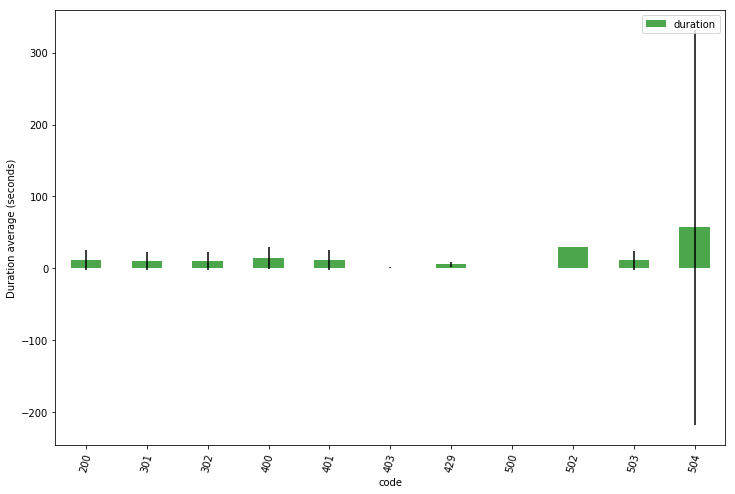

In [9]:
# Average duration by error code
df = pd.DataFrame({
    'code': df_qos['code'],
    'duration': df_qos['duration'],
})

df = df.sort_values(by='code')

fig, ax1 = plt.subplots(figsize=(12, 8))

to_drop = []

df = df[~df['code'].isin(to_drop)]

means = df.groupby('code').mean()
std = df.groupby('code').std()

means.plot(kind='bar',yerr=std, ax=ax1, color={'r','g'}, alpha=0.7)
ax1.set_ylabel('Duration average (seconds)')
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=75)


In [10]:
df.groupby('code').describe()

duration                                                          \
         count       mean         std        min        25%        50%   
code                                                                     
200     4669.0  11.318461   13.623504   0.867131   3.089122   5.910894   
301      684.0  10.107535   12.401705   0.855850   2.767499   5.356899   
302      367.0   9.881301   12.953223   0.787396   2.405169   4.858601   
400     2392.0  14.415400   15.731241   0.820984   4.825415   8.465852   
401       43.0  11.374377   13.410210   2.634021   3.604384   6.212747   
403       53.0   0.566095    0.670910   0.181818   0.344489   0.395129   
429        4.0   5.530899    3.234781   1.389289   3.827320   6.030985   
500   165978.0   0.913355    0.115727   0.523227   0.836671   0.915498   
502        1.0  29.868346         NaN  29.868346  29.868346  29.868346   
503      200.0  11.301080   13.075824   0.884850   4.490497   5.988612   
504    21203.0  56.872083  275.133296   1.003875  60.980650  61.031589   

                               
            75%           max  
code                           
200   13.110959     78.915466  
301   11.996353     60.153231  
302   10.698917     62.855145  
400   16.638282    116.807594  
401   12.417760     58.937885  
403    0.473272      3.686967  
429    7.734563      8.672337  
500    0.972393      3.275827  
502   29.868346     29.868346  
503   12.032653     60.172535  
504   61.088170  31964.560820

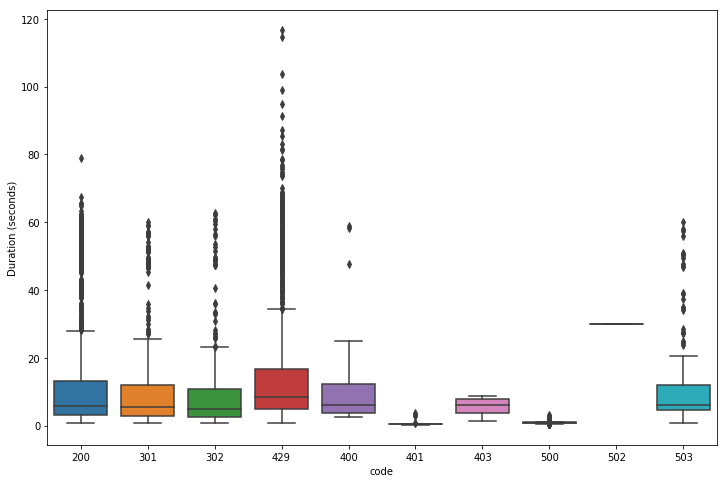

In [11]:
# Duration by error code
df = pd.DataFrame({
    'code': df_qos['code'],
    'duration': df_qos['duration'],
})

to_drop = [504]

df = df[~df['code'].isin(to_drop)]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax = sns.boxplot(x="code", y="duration", data=df, ax=ax1)
ax1.set_ylabel('Duration (seconds)')
ax1.set_xticklabels(set(df.code))
plt.sca(ax1)# matplotlib

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

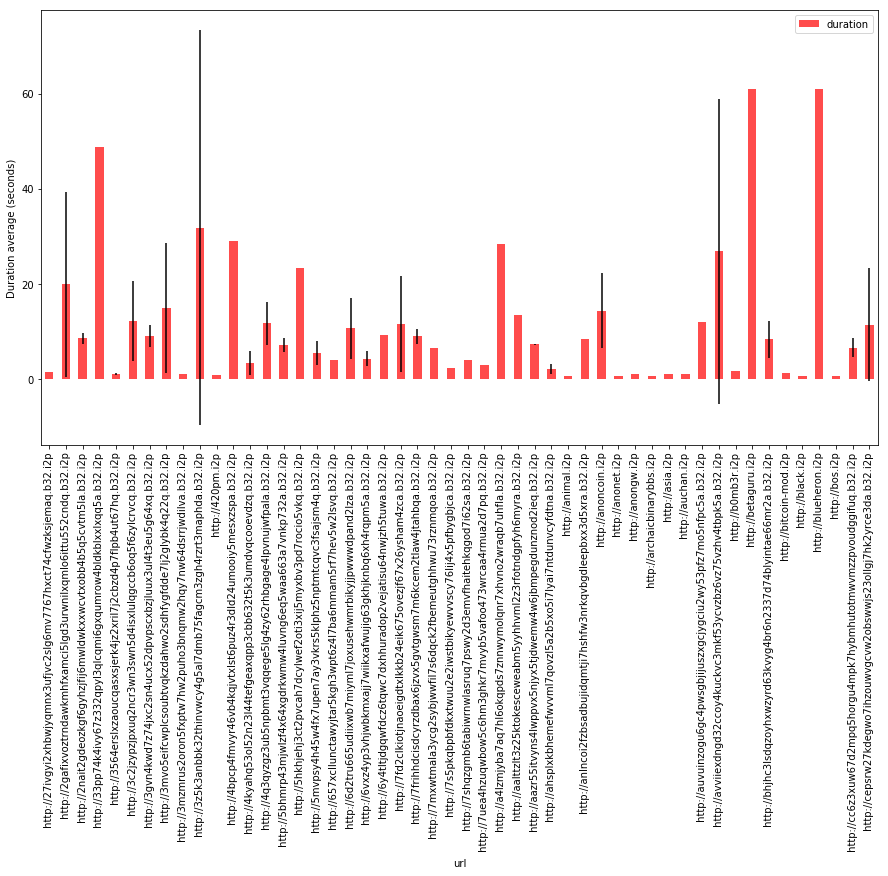

In [12]:
# Average duration by eepsite
df = pd.DataFrame({
    'url': df_qos['url'],
    'duration': df_qos['duration'],
})

fig, ax1 = plt.subplots(figsize=(15, 8),)

df = df.sort_values(by='url')

means = df.groupby('url').mean()
std = df.groupby('url').std()

means = means[0:50]
std = std[0:50]

means.plot(kind='bar',yerr=std, ax=ax1, color={'r'}, alpha=0.7)
ax1.set_ylabel('Duration average (seconds)')
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

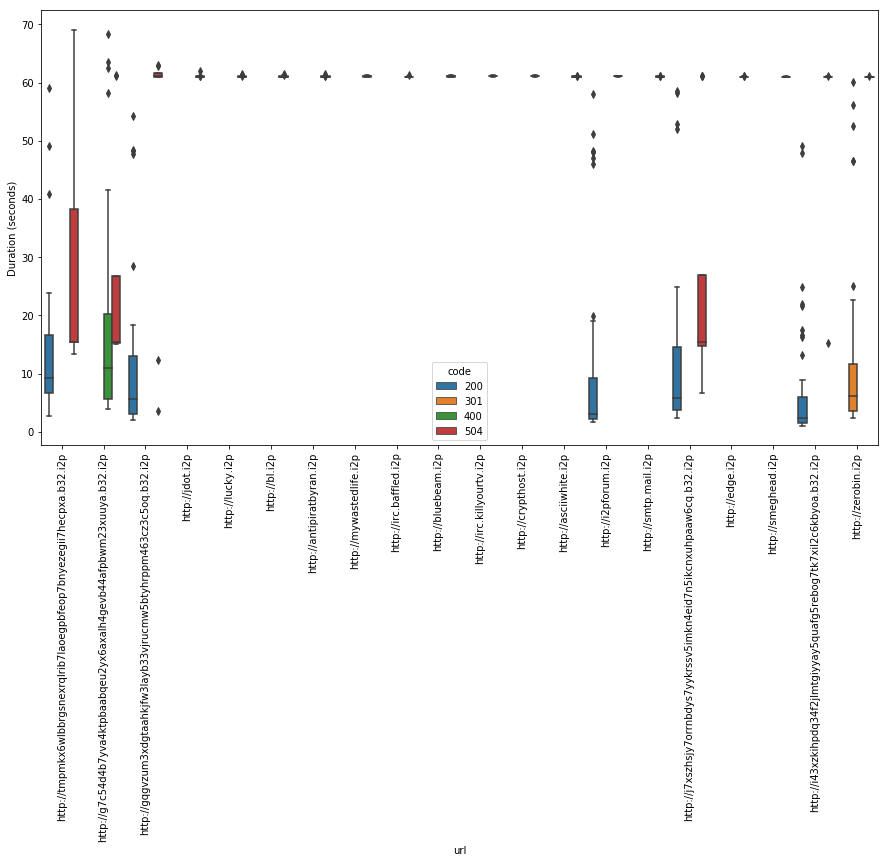

In [13]:
# Average duration by eepsite
df = pd.DataFrame({
    'url': df_qos['url'],
    'duration': df_qos['duration'],
    'code': df_qos['code']
})

fig, ax1 = plt.subplots(figsize=(15, 8),)

df = df.sort_values(by='duration',ascending=False)

eepsites = list(df[0:10000].groupby('url').groups.keys())[0:20]
df = df[df['url'].isin(eepsites)]

ax = sns.boxplot(x="url", y="duration", data=df, hue='code', ax=ax1)
ax1.set_ylabel('Duration (seconds)')
#ax1.set_ylim((0,3))
plt.sca(ax1)# matplotlib only acts over the current axis
plt.xticks(rotation=90)

# Availability study

In [14]:
HTTP_RESPONSE_CODES = {200:'OK', 
                       301:'Moved Permanently', 
                       302:'Found (Previously "Moved temporarily")', 
                       400:'Bad Request', 
                       401:'Unauthorized',
                       403:'Forbidden',
                       429:'Too Many Requests',
                       500:'Internal Server Error',
                       502:'Bad Gateway',
                       503:'Service Unavailable',
                       504:'Gateway Timeout'}

In [15]:
df_qos

url  protocol  code  \
0                            http://tracker.crypthost.i2p  HTTP/1.1   400   
1                             http://tracker.thebland.i2p  HTTP/1.1   400   
2                               http://syndie-project.i2p  HTTP/1.1   200   
3                                    http://trac.i2p2.i2p  HTTP/1.1   200   
4                                    http://thematrix.i2p  HTTP/1.1   500   
5                             http://tracker2.postman.i2p  HTTP/1.1   302   
6                                       http://planet.i2p  HTTP/1.1   200   
7                                  http://bbs.tokachi.i2p  HTTP/1.1   500   
8                                        http://31337.i2p  HTTP/1.1   500   
9                                      http://miraiex.i2p  HTTP/1.1   500   
10                                    http://domenica.i2p  HTTP/1.1   500   
11                                       http://stats.i2p  HTTP/1.1   200   
12                                         http://red.i2p  HTTP/1.1   500   
13                                         http://sun.i2p  HTTP/1.1   500   
14                                      http://mr-fox.i2p  HTTP/1.1   500   
15                                  http://theanondog.i2p  HTTP/1.1   500   
16      http://kgh3va66n5fqrtlhqsen2km6x7k2362hn5edk5o...  HTTP/1.1   504   
17                                 http://i2p-projekt.i2p  HTTP/1.1   302   
18                               http://i2pdarknetmap.i2p  HTTP/1.1   500   
19                                        http://opal.i2p  HTTP/1.1   500   
20                                      http://tordox.i2p  HTTP/1.1   500   
21      http://33mt3psjrtauk6wzt35ke7w4bkyizesnsjlal45...  HTTP/1.1   504   
22      http://ydlngh3dd52av3aalpd3uqi5iuvmby7nxpkwcla...  HTTP/1.1   504   
23                                     http://redzara.i2p  HTTP/1.1   200   
24                                     http://102chan.i2p  HTTP/1.1   500   
25                                         http://1st.i2p  HTTP/1.1   500   
26                             http://opentracker.dg2.i2p  HTTP/1.1   400   
27      http://mbdyxyxj4tliyvcc54xknkyg7ficigoyvfnfese...  HTTP/1.1   504   
28      http://fzbdltgsg7jrpz7gmjfvhpcdnw5yrglwspnxqp4...  HTTP/1.1   504   
29      http://kjxtkdcqqde2fvtrhrkpkpejth4vt2cudavqdjh...  HTTP/1.1   504   
...                                                   ...       ...   ...   
195564                            http://packofwolves.i2p  HTTP/1.1   500   
195565                                 http://scanlab.i2p  HTTP/1.1   500   
195566                                 http://hikkach.i2p  HTTP/1.1   500   
195567                                http://coinjoin.i2p  HTTP/1.1   500   
195568                                  http://top500.i2p  HTTP/1.1   500   
195569                            http://torrentshere.i2p  HTTP/1.1   500   
195570                              http://rochvellon.i2p  HTTP/1.1   500   
195571                          http://randomthoughts.i2p  HTTP/1.1   500   
195572                                     http://ras.i2p  HTTP/1.1   500   
195573                                 http://polaris.i2p  HTTP/1.1   500   
195574                                 http://pingwin.i2p  HTTP/1.1   500   
195575                               http://notitaccu.i2p  HTTP/1.1   500   
195576                                http://ninja-bt.i2p  HTTP/1.1   500   
195577                                http://darklib2.i2p  HTTP/1.1   500   
195578                                  http://sweden.i2p  HTTP/1.1   500   
195579                              http://intraproxy.i2p  HTTP/1.1   500   
195580                               http://mp3.amiga.i2p  HTTP/1.1   500   
195581                               http://palehorse.i2p  HTTP/1.1   500   
195582                                http://slashd07.i2p  HTTP/1.1   500   
195583                                   http://start.i2p  HTTP/1.1   500   
195584                         http://spectrumclim